In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
#a)
# Aqui va su código
import numpy as np
import math
import matplotlib.pyplot as plt


def taylor_seno(angulo,iteraciones):
  seno = 0
  for i in range(iteraciones):
    seno += (-1)**i * angulo**(2*i+1)/math.factorial(2*i+1)
  return seno


x = np.deg2rad(30)
max_iter = 50 #numero de iteraciones
seno = taylor_seno(x,max_iter)
seno_real = np.sin(x)

print(f"El valor de seno con {max_iter} iteraciones es {seno}")
print(f"El valor real es {seno_real}")


El valor de seno con 50 iteraciones es 0.49999999999999994
El valor real es 0.49999999999999994


In [ ]:
#b)
def taylor_seno32(angulo,tol):
  seno = 0
  real = math.sin(angulo)
  i = 0
  errores_porcentuales = []  #Para guardar los errores porcentuales
  errors = np.zeros(max_iter) #Guardar el error
  iteraciones = np.arange(max_iter)  #iteracion asociada al error
  while abs(real - seno)>tol:
    seno += (-1)**i * angulo**(2*i+1)/math.factorial(2*i+1)
    error = abs(real - seno)
    errors[i] = error
    error_p = abs(real - seno)/abs(real)*100  #Error porcentual
    errores_porcentuales.append(error_p)
    i += 1
    if i> max_iter: break
  return errors[:i], iteraciones[:i], seno, i, errores_porcentuales

x = math.radians(80)
tol = np.finfo(np.float32).eps  #Epsilon de la maquina
er, N, seno, n_interaciones, lista_errores32 = taylor_seno32(x,tol)
print(f"Solo se necesitan {n_interaciones} terminos para que la serie converja")




Solo se necesitan 6 terminos para que la serie converja


<function matplotlib.pyplot.show(close=None, block=None)>

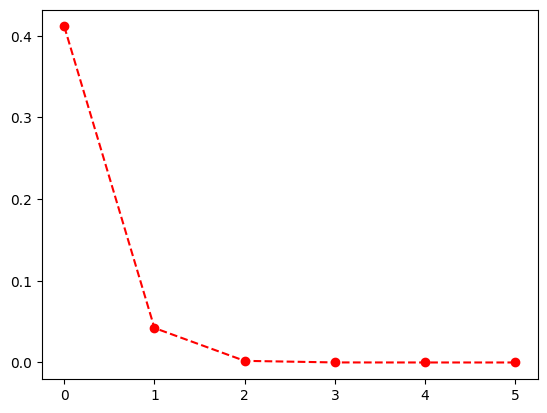

In [ ]:
plt.plot(N, er, "ro--")
plt.show

In [ ]:
#c)

def taylor_seno64(angulo,tol):
  max_iter = 100
  seno = 0
  real = math.sin(angulo)
  i = 0
  errores_porcentuales = []  #Para guardar los errores porcentuales
  errors = np.zeros(max_iter) #Guardar el error
  iteraciones = np.arange(max_iter)  #iteracion asociada al error
  while abs(real - seno)>tol:
    seno += (-1)**i * angulo**(2*i+1)/(math.factorial(2*i+1))
    error = abs(real - seno)
    errors[i] = error
    error_p = abs(real - seno)/abs(real)*100  #Error porcentual
    errores_porcentuales.append(error_p)
    i += 1
    if i> max_iter: break
  return errors[:i], iteraciones[:i], seno, i, errores_porcentuales

x = np.float64(math.radians(80))
tol = np.finfo(np.float64).eps  #Epsilon de la maquina
er, N, seno, n_interaciones, lista_errores64 = taylor_seno64(x,tol)
print(f"Solo se necesitan {n_interaciones} terminos para que la serie converja")


Solo se necesitan 10 terminos para que la serie converja


<function matplotlib.pyplot.show(close=None, block=None)>

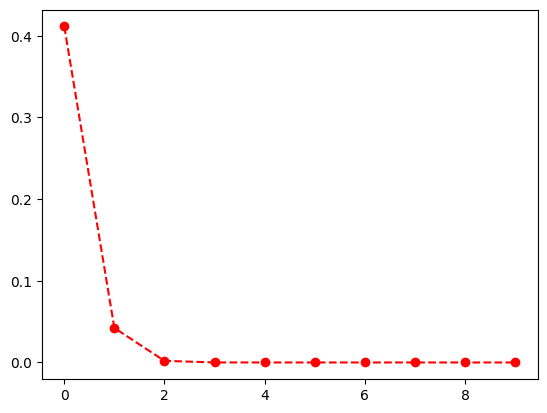

In [ ]:
plt.plot(N, er, "ro--")
plt.show

In [ ]:
#c)
print(str(lista_errores32))
print(str(lista_errores64))


[41.7803015182147, 4.287698081849443, 0.20289877348068794, 0.005545268785671155, 9.879222100215435e-05, 1.238574693965129e-06]
[41.7803015182147, 4.287698081849443, 0.20289877348068794, 0.005545268785671155, 9.879222100215435e-05, 1.238574693965129e-06, 1.1522655667784231e-08, 8.272494331793109e-11, 4.5094000173306667e-13, 2.2547000086653338e-14]


Con la función taylor_seno64 el valor que arroja para sen(x) tiene un porcentaje de error más bajo que la función taylor_seno32. Esto se puede deber a que al tomar valores en float64 estos son más precisos.

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
# Aqui va su código
def e(x):
  max_iter = 100
  e = 0
  contador = 1
  for i in range(max_iter):
    tol = (-x)**(i+1)/math.factorial(i+1)
    e = e + (-1)**i * (x**i/math.factorial(i))
    print(contador, e)
    if abs(tol) <= abs(e*1e-7): break
    contador = contador+1


In [ ]:
#a)
e(0.5)

1 1.0
2 0.5
3 0.625
4 0.6041666666666666
5 0.6067708333333333
6 0.6065104166666666
7 0.6065321180555555
8 0.6065305679563492
9 0.6065306648375496


In [ ]:
np.exp(-0.5)

0.6065306597126334

In [ ]:
#b)
def e2(x,max_iter):   #Es la misma función, solo que crea una lista con los valores de e
  lista = []
  e = 0
  for i in range(max_iter):
    tol = (-x)**(i+1)/math.factorial(i+1)
    e = e + (-1)**i * (x**i/math.factorial(i))
    lista.append(e)
    if abs(tol) <= abs(e*1e-7):
      return lista, lista[-1]
      break
  return lista, lista[-1]


La serie converge a 4.539992793609265e-05


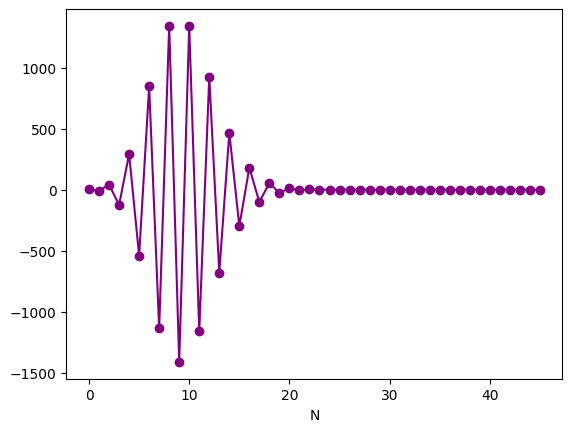

In [ ]:
#Para x=10
valores_y, resultado = e2(10,100)
x = np.arange(len(valores_y))
y = np.array(valores_y)

plt.plot(x,y,'o-',color="purple")
plt.xlabel('N')

print(f"La serie converge a {resultado}")


Text(0.5, 0, 'N')

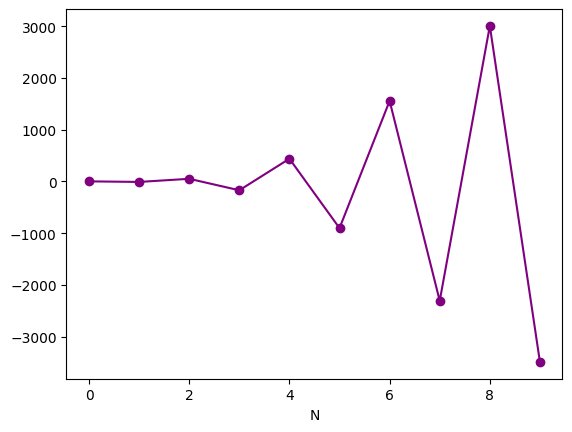

In [ ]:
#Ahora para n=x-1
valores_y, resultado = e2(11,10)
x = np.arange(len(valores_y))
y = np.array(valores_y)

plt.plot(x,y,'o-',color="purple")
plt.xlabel('N')


In [ ]:
#c)
def taylor_exp(x,max_iter):
  lista = []
  e = 0
  e_real = np.exp(-x)
  for i in range(max_iter):
    e += (x**i/math.factorial(i))
    lista.append(1/e)
    tol = abs(e-e_real)
    if tol < 1e-6:
      return lista, lista[-1]
      break
  return lista, lista[-1]


La serie converge a 4.539992976248486e-05


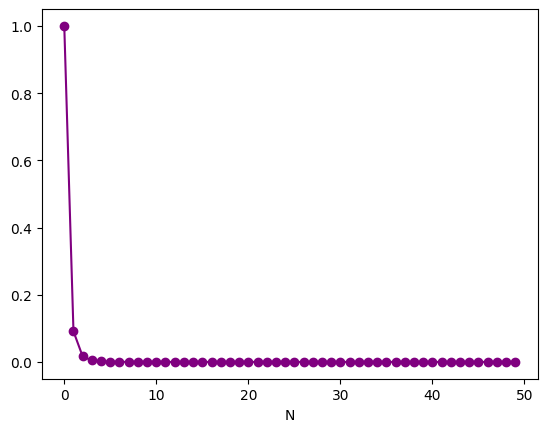

In [ ]:
valores_y, resultado= taylor_exp(10,50)
x2 = np.arange(len(valores_y))
y2 = np.array(valores_y)

plt.plot(x2,y2,'o-',color="purple")
plt.xlabel('N')

print(f"La serie converge a {resultado}")

Text(0, 0.5, 'Error')

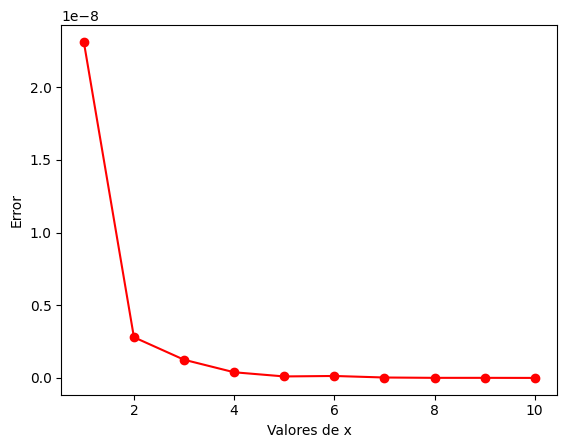

In [ ]:
#d)

#Para valores de 1 a 10

x = np.arange(1,11)
errores = []
for i in range(1,11):
  real = np.exp(-i)
  lista, resultado = e2(i,100)
  error = abs(real-resultado)
  errores.append(error)

errores = np.array(errores)
plt.plot(x,errores,"o-", color='red')
plt.xlabel('Valores de x')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

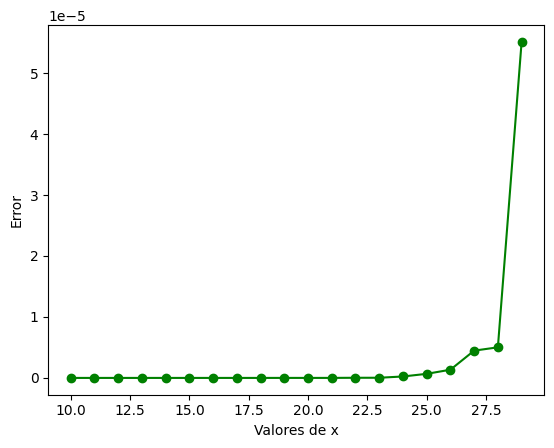

In [ ]:
#Para valores mayores de 10

x = np.arange(10,30)
errores = []
for i in range(10,30):
  real = np.exp(-i)
  lista, resultado = e2(i,100)
  error = abs(real-resultado)
  errores.append(error)

errores = np.array(errores)
plt.plot(x,errores,"o-", color='green')
plt.xlabel('Valores de x')
plt.ylabel('Error')

In [ ]:
#e)
def e_error(x):
  max_iter = 100
  e = 0
  errores = []
  real = np.exp(-x)
  contador = 0
  for i in range(max_iter):
    e = e + (-1)**i * (x**i/math.factorial(i))
    error = abs(e-real)
    errores.append(error)
    contador = contador+1
    if error<1e-7: break
  valores_N = np.arange(contador)
  errores = np.array(errores)

  plt.plot(valores_N, errores, "o-", color="blue")
  plt.xlabel('Valores de N')
  plt.ylabel('Error')
  plt.title(f"Para x = {x}")


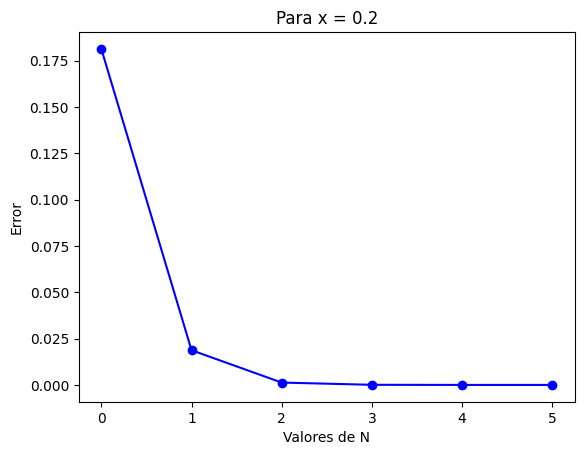

In [ ]:
e_error(0.2)

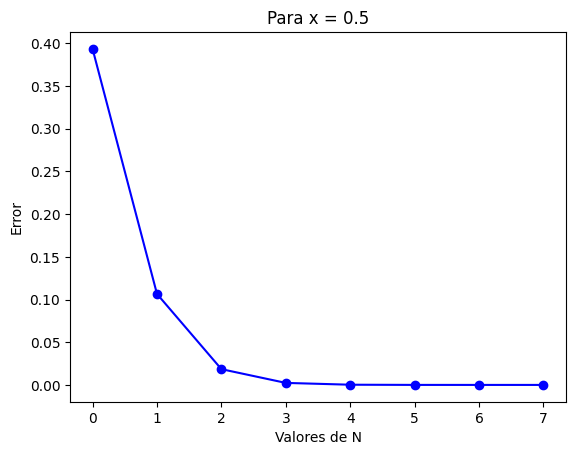

In [ ]:
e_error(0.5)

Para valores muy grandes la serie ya no converge al valor real

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
# Aqui va su código

#a)
def sn1(iteraciones):
  lista = []
  valor = 0
  iteraciones = iteraciones*2
  for i in range(1, iteraciones + 1):
    valor = valor + ((-1)**i)*(i/(i+1))
    lista.append(valor)
  return valor, lista

def sn2(iteraciones):
  lista = []
  valor = 0
  for i in range(1, iteraciones + 1):
    valor = valor + (-1)*(2*i-1)/(2*i ) + (2*i)/(2*i+1)
    lista.append(valor)
  return valor, lista


def sn3(iteraciones):
  lista = []
  valor = 0
  for i in range(1, iteraciones + 1):
    valor = valor + 1/(2*i*(2*i+1))
    lista.append(valor)
  return valor, lista

In [ ]:
#b)
#Para x=10
valor1, valores1 = sn1(10)
valor2, valores1 = sn2(10)
valor3, valores1 = sn3(10)


print(f"Para x=10 con la serie sn1 el resultado es {valor1}")
print(f"Para x=10 con la serie sn2 el resultado es {valor2}")
print(f"Para x=10 con la serie sn3 el resultado es {valor3}")

Para x=10 con la serie sn1 el resultado es 0.2836095492055243
Para x=10 con la serie sn2 el resultado es 0.2836095492055243
Para x=10 con la serie sn3 el resultado es 0.2836095492055244


In [ ]:
error1 = valor1 - valor2
error2 = valor2 - valor3
error3 = valor1 - valor3

print(f"Entre sn1 y sn2 el error es de {error1}")
print(f"Entre sn2 y sn3 el error es de {error2}")
print(f"Entre sn1 y sn3 el error es de {error3}")

Entre sn1 y sn2 el error es de 0.0
Entre sn2 y sn3 el error es de -1.1102230246251565e-16
Entre sn1 y sn3 el error es de -1.1102230246251565e-16


In [ ]:
#c)
def error(sn,n):
  lista = []
  for i in range(n):
    valor, valores = sn(n)
    valor_real, valores_real = sn3(n)
    e = abs((valor-valor_real)/valor_real)
    lista.append(e)

  x = np.arange(n)
  y = np.array(lista)


  plt.loglog(x,y,"o-")
  plt.xlabel('Log de N')
  plt.ylabel('Log error relativo')


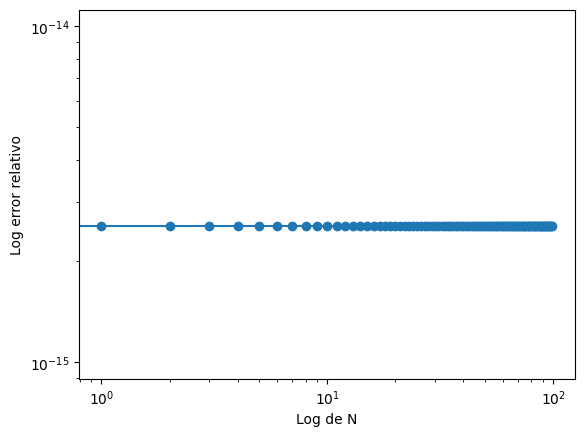

In [ ]:
error(sn1,100)

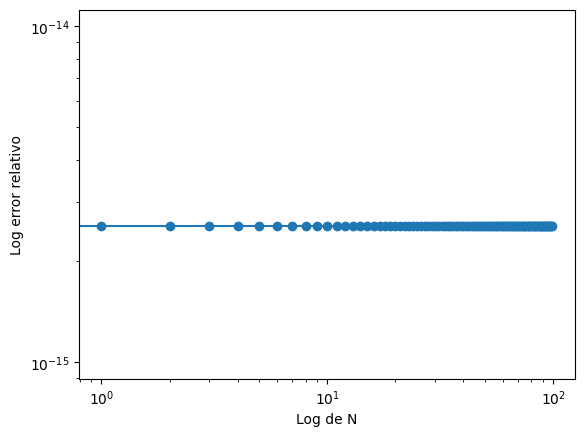

In [ ]:
error(sn2,100)

In [ ]:
#d)
#Las series sn1 y sn2 son bastante exactas ya que el error de ambas es bastante pequeño